In [1]:
import pandas as pd

In [2]:
data= pd.read_excel('/content/DailyUpdateDataAgregatCovid-19Jakarta.xlsx', sheet_name='Data Jakarta')

In [3]:
data.head()

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Belum Diketahui (masih verifikasi),Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,2020-03-03 18:00:00,3,0,1,0,2,NaN,NaN,NaN,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,2020-03-04 18:00:00,3,0,1,0,2,NaN,NaN,NaN,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,2020-03-05 18:00:00,7,0,3,0,4,NaN,NaN,NaN,4,4,0,NaN,NaN,NaN


In [4]:
if pd.to_datetime(data['Tanggal'], format='%b-%d-%Y', errors='coerce').notnull().all():
    print('Yay') 

Yay


In [5]:
def outlier(series):
    Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [6]:
data.drop(data.columns[17:], axis = 1, inplace=True)
data.set_index('Tanggal', inplace=True)

In [7]:
data.drop(['Belum Diketahui (masih verifikasi)', 'Menunggu Hasil', 'Tenaga Kesehatan Terinfeksi'], axis = 1, inplace=True)

In [8]:
data['Meninggal Harian'] = pd.Series([0]+[data['Meninggal'].iloc[i] - data['Meninggal'].iloc[i-1] for i in range(1, data.shape[0])], index=data.index)
data['Total Pasien Harian'] = pd.Series([0]+[data['Total Pasien'].iloc[i] - data['Total Pasien'].iloc[i-1] for i in range(1, data.shape[0])], index=data.index)
data['Self Isolation Harian'] = pd.Series([0]+[data['Self Isolation'].iloc[i] - data['Self Isolation'].iloc[i-1] for i in range(1, data.shape[0])], index=data.index)

In [9]:
data['Masih Perawatan Harian'] = pd.Series([0]+[data['Masih Perawatan'].iloc[i] - data['Masih Perawatan'].iloc[i-1] for i in range(1, data.shape[0])], index=data.index)

In [10]:
data_harian = data[['Jam', 'Total Pasien Harian', 'Sembuh Harian', 'Meninggal Harian', 'Self Isolation Harian', 'Masih Perawatan Harian', 'Positif Harian']].copy()

In [11]:
data_harian.head()

,Jam,Total Pasien Harian,Sembuh Harian,Meninggal Harian,Self Isolation Harian,Masih Perawatan Harian,Positif Harian
Tanggal,,,,,,,
2020-03-01,NaN,0,0,0,0,0,0
2020-03-02,NaN,0,0,0,0,0,0
2020-03-03,NaN,3,0,1,0,2,3
2020-03-04,NaN,0,0,0,0,0,0
2020-03-05,NaN,4,0,2,0,2,4


In [12]:
data_harian.loc[data_harian['Self Isolation Harian'] == 7505]

,Jam,Total Pasien Harian,Sembuh Harian,Meninggal Harian,Self Isolation Harian,Masih Perawatan Harian,Positif Harian
Tanggal,,,,,,,


In [13]:
for column in data_harian.columns:
    if (data_harian[column].dtype != 'datetime64[ns]'):
      lower, upper = outlier(data_harian[column])
      print(f'Outlier adalah {lower} dan {upper}')
      print(f'Outlier pada kolom {column} adalah {sorted(list(data_harian.loc[(data_harian[column] < lower) | (data_harian[column] > upper)][column]))}')

Outlier adalah 8.0 dan 8.0
Outlier pada kolom Jam adalah [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0]
Outlier adalah -1553.75 dan 3116.25
Outlier pada kolom Total Pasien Harian adalah [3144, 3151, 3165, 3221, 3285, 3309, 3340, 3362, 3395, 3437, 3448, 3474, 3476, 3491, 3512, 3536, 3567, 3614, 3632, 3786, 3792, 3810, 4144, 4213, 4693, 4737, 4895, 5014, 5582, 6934, 7379, 7505, 7680, 8348, 9271, 9394]
Outlier adalah -1474.5 dan 2857.5
Outlier pada kolom Sembuh Harian adalah [2939, 2960, 2963, 2971, 3025, 3052, 3244, 3255, 3416, 3438, 3484, 3504, 3504, 3568, 3674, 3771, 4005, 4313, 4325, 4342, 4345, 4349, 4527, 4610, 5757]
Outlier adalah -18.0 dan 46.0
Outlier pada kolom Meninggal Harian adalah [47, 48, 48, 49, 50, 50, 50, 50, 51, 51, 52, 53, 54, 59, 60, 63, 64, 69, 70, 70, 71, 78, 79]
Outlier adalah -499.75 dan 610.25
Outlier pada kolom Self Isolation Harian adalah [-3345, -2557, -1866, -1815, -1498, -1444, -1400, -1367, -1330

In [14]:
# outliers = {}
# for column in data.columns:
#     if (data[column].dtype != 'datetime64[ns]'):
#       for i in range(data.resample('M').sum().shape[0]):
#         bulan = ((i+3)%12) if ((i+3)%12) > 0 else 12
#         year = 2020+((i+3)//12)
#         lower, upper = outlier(data.loc[(data.index.month == bulan) & (data.index.year == year)][column])
#         # print(((i+3)%12))
#         # print(2020+((i+3)//12))
#         outliers[column,bulan, year] = list(data.loc[((data[column] < lower) | (data[column] > upper)) & ((data.index.month == bulan) & (data.index.year == year))][column])
#         print(f'Outlier adalah {lower} dan {upper}')
#         print(f'Outlier bulan {bulan} tahun {year} pada kolom {column} adalah {list(data.loc[((data[column] < lower) | (data[column] > upper)) & ((data.index.month == bulan) & (data.index.year == year))][column])}')

In [15]:
data_harian.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 2020-03-01 to 2021-06-30
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jam                     468 non-null    float64
 1   Total Pasien Harian     487 non-null    int64  
 2   Sembuh Harian           487 non-null    int64  
 3   Meninggal Harian        487 non-null    int64  
 4   Self Isolation Harian   487 non-null    int64  
 5   Masih Perawatan Harian  487 non-null    int64  
 6   Positif Harian          487 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 30.4 KB


In [16]:
agregasi = {}
agregasi['mean'] = data_harian['Positif Harian'].mean()
agregasi['median'] = data_harian['Positif Harian'].median()
agregasi['modus'] = data_harian['Positif Harian'].mode()[0]


In [17]:
agregasi['min'] = data_harian['Positif Harian'].min()
agregasi['max'] = data_harian['Positif Harian'].max()
agregasi

{'max': 9394,
 'mean': 1115.9507186858316,
 'median': 845.0,
 'min': 0,
 'modus': 0}

In [18]:
data_harian.head()

,Jam,Total Pasien Harian,Sembuh Harian,Meninggal Harian,Self Isolation Harian,Masih Perawatan Harian,Positif Harian
Tanggal,,,,,,,
2020-03-01,NaN,0,0,0,0,0,0
2020-03-02,NaN,0,0,0,0,0,0
2020-03-03,NaN,3,0,1,0,2,3
2020-03-04,NaN,0,0,0,0,0,0
2020-03-05,NaN,4,0,2,0,2,4


In [19]:
data_harian['Hari'] = data_harian.index.dayofweek

In [20]:
data_harian['Hari'].replace({0 : "Senin", 1 : "Selasa", 2 : "Rabu", 3 : "Kamis", 4 : "Jumat", 5 : "Sabtu", 6 : "Minggu"}, inplace= True)

In [21]:
data['Meninggal Harian'] = pd.Series([0]+[data['Meninggal'].iloc[i] - data['Meninggal'].iloc[i-1] for i in range(1, data.shape[0])], index=data.index)

In [22]:
data_harian.groupby("Hari").mean()

,Jam,Total Pasien Harian,Sembuh Harian,Meninggal Harian,Self Isolation Harian,Masih Perawatan Harian,Positif Harian
Hari,,,,,,,
Jumat,8.447761,1149.985507,921.521739,17.492754,107.202899,103.768116,1149.985507
Kamis,8.454545,1141.507246,909.405797,15.637681,97.956522,118.507246,1141.507246
Minggu,8.298507,1221.971429,1053.157143,17.228571,111.985714,39.600000,1221.971429
Rabu,8.447761,1076.528571,864.471429,17.342857,72.342857,122.371429,1076.528571
Sabtu,8.298507,1213.521739,1016.724638,16.884058,204.159420,-24.246377,1213.521739
Selasa,8.447761,913.771429,959.942857,18.557143,-28.571429,-36.157143,913.771429
Senin,8.298507,1096.614286,957.500000,18.800000,124.042857,-3.728571,1096.614286


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
plot_data = data_harian[['Positif Harian', 'Hari']].groupby("Hari").mean()

In [25]:
day_order = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

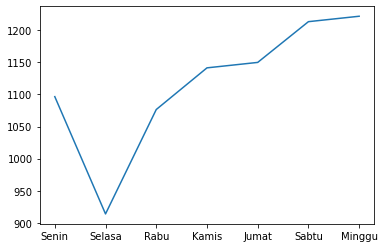

In [26]:
plt.plot(plot_data.loc[day_order])

Kesimpulan → Artinya bahwa Sembuh harian kuat dengan positif karena jumlah pasien positif meningkat. Sehingga yang sembuh juga akan meningkat

In [27]:
data_harian.index.weekofyear % 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Int64Index([1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
            ...
            1, 1, 1, 1, 1, 1, 1, 2, 2, 2],
           dtype='int64', name='Tanggal', length=487)

In [28]:
data_harian.index.date

array([datetime.date(2020, 3, 1), datetime.date(2020, 3, 2),
       datetime.date(2020, 3, 3), datetime.date(2020, 3, 4),
       datetime.date(2020, 3, 5), datetime.date(2020, 3, 6),
       datetime.date(2020, 3, 7), datetime.date(2020, 3, 8),
       datetime.date(2020, 3, 9), datetime.date(2020, 3, 10),
       datetime.date(2020, 3, 11), datetime.date(2020, 3, 12),
       datetime.date(2020, 3, 13), datetime.date(2020, 3, 14),
       datetime.date(2020, 3, 15), datetime.date(2020, 3, 16),
       datetime.date(2020, 3, 17), datetime.date(2020, 3, 18),
       datetime.date(2020, 3, 19), datetime.date(2020, 3, 20),
       datetime.date(2020, 3, 21), datetime.date(2020, 3, 22),
       datetime.date(2020, 3, 23), datetime.date(2020, 3, 24),
       datetime.date(2020, 3, 25), datetime.date(2020, 3, 26),
       datetime.date(2020, 3, 27), datetime.date(2020, 3, 28),
       datetime.date(2020, 3, 29), datetime.date(2020, 3, 30),
       datetime.date(2020, 3, 31), datetime.date(2020, 4, 1),
  

In [29]:
data_harian["Minggu ke-"] = (data_harian.index.weekofyear % 4) + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [30]:
plot_data = data_harian[["Positif Harian", "Minggu ke-"]].groupby("Minggu ke-").mean()

In [31]:
data_harian[["Positif Harian", "Minggu ke-"]].groupby("Minggu ke-").mean().max()

Positif Harian    1314.897638
dtype: float64

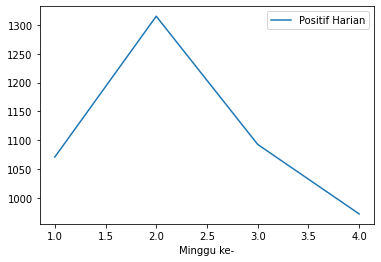

In [32]:
plot_data.loc[[1, 2, 3, 4]].plot()

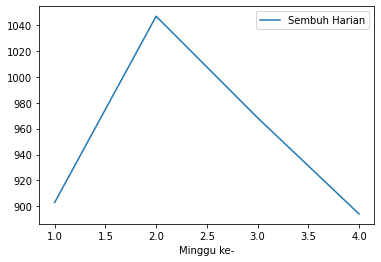

In [33]:
plot_data = data_harian[["Sembuh Harian", "Minggu ke-"]].groupby("Minggu ke-").mean()
plot_data.plot()

In [34]:
data_harian[["Sembuh Harian", "Minggu ke-"]].groupby("Minggu ke-").mean().max()

Sembuh Harian    1046.905512
dtype: float64

In [35]:
data_harian.columns

Index(['Jam', 'Total Pasien Harian', 'Sembuh Harian', 'Meninggal Harian',
       'Self Isolation Harian', 'Masih Perawatan Harian', 'Positif Harian',
       'Hari', 'Minggu ke-'],
      dtype='object')

In [36]:
data_harian.tail()

,Jam,Total Pasien Harian,Sembuh Harian,Meninggal Harian,Self Isolation Harian,Masih Perawatan Harian,Positif Harian,Hari,Minggu ke-
Tanggal,,,,,,,,,
2021-06-26,8.0,9271,2725,43,4504,1999,9271,Sabtu,2
2021-06-27,8.0,9394,3484,49,4635,1226,9394,Minggu,2
2021-06-28,8.0,8348,3438,79,3788,1043,8348,Senin,3
2021-06-29,8.0,7379,3504,78,3252,545,7379,Selasa,3
2021-06-30,8.0,7680,3504,60,2325,1791,7680,Rabu,3


In [37]:
def plot_mingguke(column):
  plot_data = data_harian[[column, "Minggu ke-"]].groupby("Minggu ke-").mean()
  plot_data.plot()

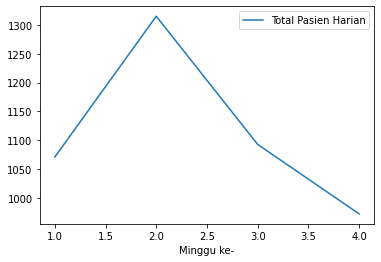

In [38]:
plot_mingguke('Total Pasien Harian')

In [39]:
data_harian["Tanggal Angka"] = data_harian.index.day

In [40]:
def plott(column, group):
  plot_data = data_harian[[column, group]].groupby(group).mean()
  plot_data.plot()

In [41]:
data_harian[["Positif Harian", "Tanggal Angka"]].groupby("Tanggal Angka").mean().max()

Positif Harian    1427.0625
dtype: float64

In [42]:
data_harian[["Positif Harian", "Tanggal Angka"]].groupby("Tanggal Angka").mean()

,Positif Harian
Tanggal Angka,
1,942.562500
2,855.375000
3,902.062500
4,908.687500
5,860.812500
6,888.062500
7,1096.437500
8,1001.687500
9,965.812500


In [43]:
def plottahun(column, group, tahun):
  plot_data = data_harian.loc[data_harian['Tahun'] == tahun][[column, group]].groupby(group).mean()
  plot_data.plot()

In [44]:
data_harian["Bulan"] = data_harian.index.month

In [45]:
data_harian["Tahun"] = data_harian.index.year

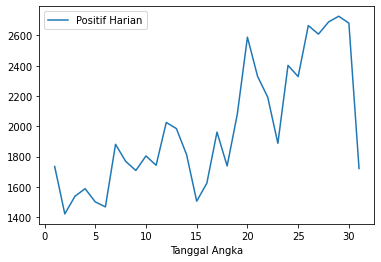

In [46]:
plottahun("Positif Harian", 'Tanggal Angka', 2021)

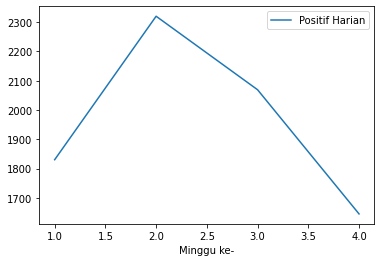

In [47]:
plottahun("Positif Harian", "Minggu ke-", 2021)

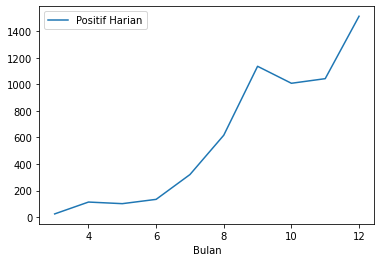

In [48]:
plottahun("Positif Harian", "Bulan", 2020)

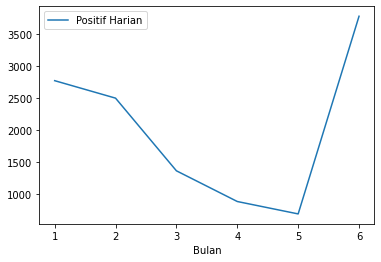

In [49]:
plottahun("Positif Harian", "Bulan", 2021)

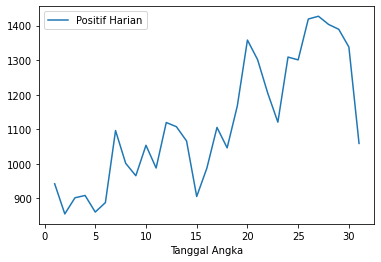

In [50]:
plott("Positif Harian", "Tanggal Angka")

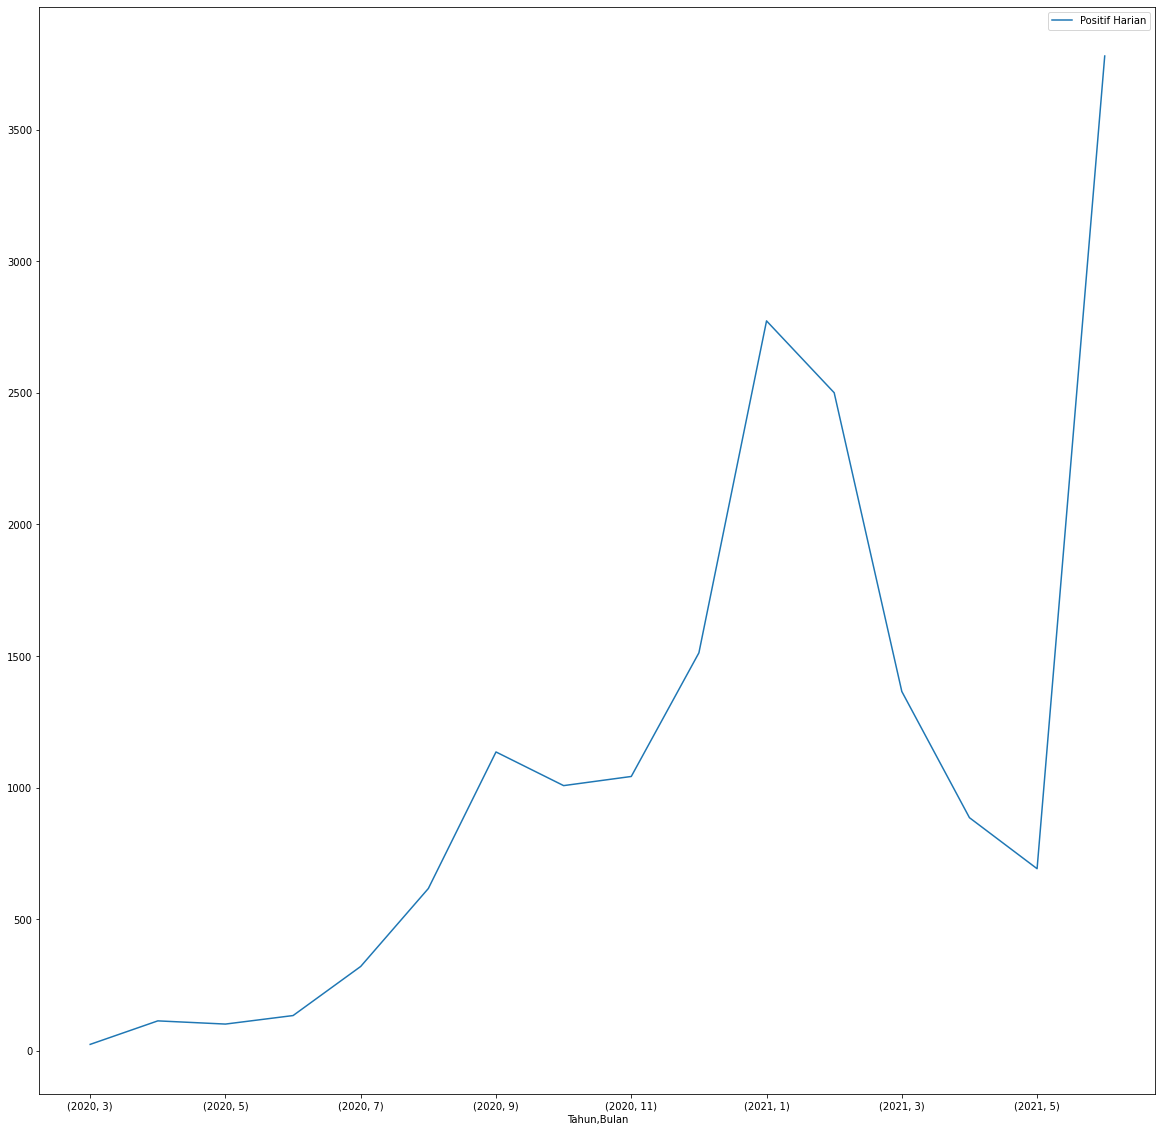

In [51]:
plot_data = data_harian[["Positif Harian", "Tahun", "Bulan"]].groupby(["Tahun", "Bulan"]).mean()
plot_data.plot(figsize=[20, 20])

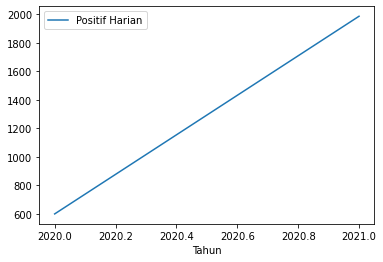

In [52]:
plott("Positif Harian", "Tahun")

In [53]:
data_harian.columns

Index(['Jam', 'Total Pasien Harian', 'Sembuh Harian', 'Meninggal Harian',
       'Self Isolation Harian', 'Masih Perawatan Harian', 'Positif Harian',
       'Hari', 'Minggu ke-', 'Tanggal Angka', 'Bulan', 'Tahun'],
      dtype='object')

In [54]:
list_column = ["Total Pasien Harian", "Sembuh Harian", "Meninggal Harian", "Self Isolation Harian", "Masih Perawatan Harian"]

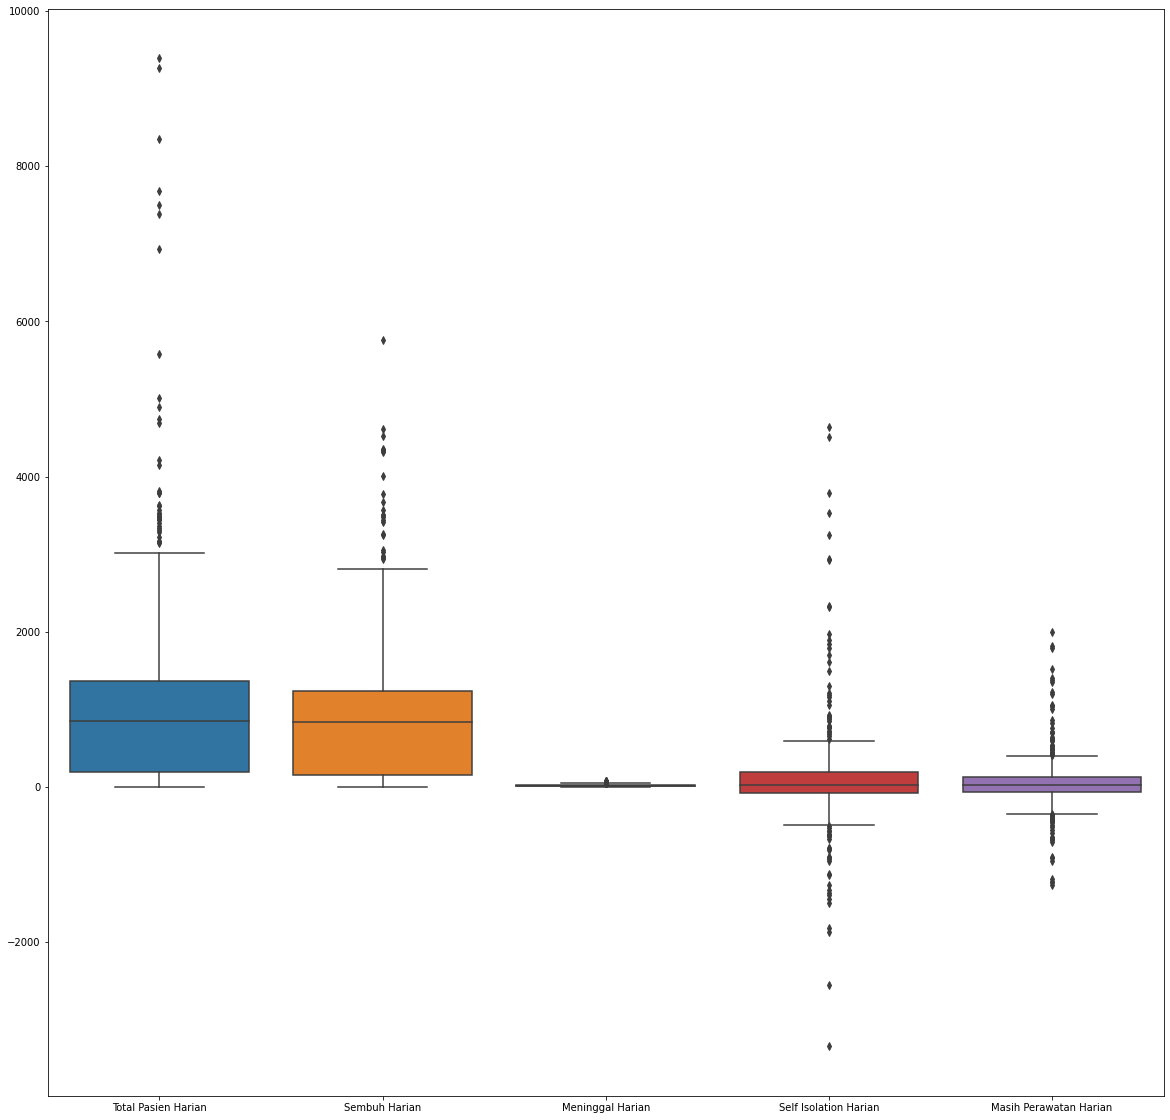

In [55]:

plt.figure(figsize=[20, 20])
sns.boxplot(data = data_harian[list_column])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


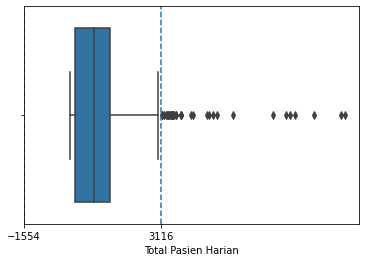

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


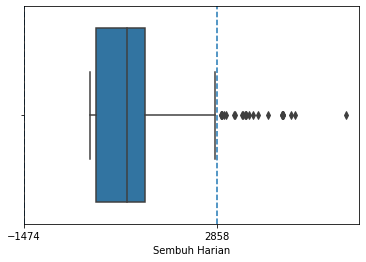

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


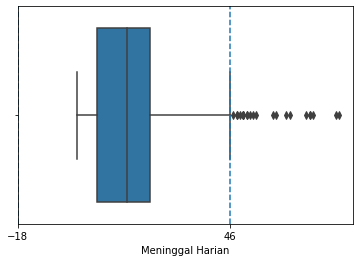

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


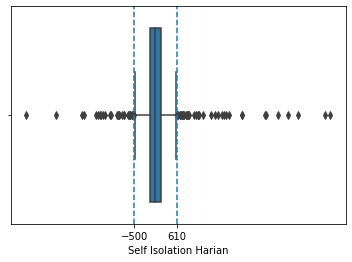

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


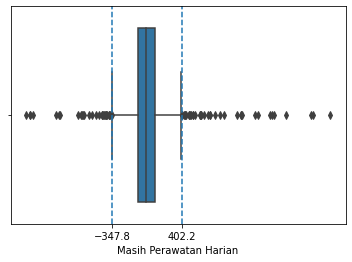

In [56]:
for column in ["Total Pasien Harian", "Sembuh Harian", "Meninggal Harian", "Self Isolation Harian", "Masih Perawatan Harian"]:
  graph = sns.boxplot(data_harian[column])
  lower, upper = outlier(data_harian[column])
  graph.set_xticks([lower, upper])
  graph.axvline(lower, linestyle="dashed")
  graph.axvline(upper, linestyle="dashed")
  plt.show()

In [57]:
data_harian.shape[0]

487

In [58]:
for column in ["Total Pasien Harian", "Sembuh Harian", "Meninggal Harian", "Self Isolation Harian", "Masih Perawatan Harian"]:
    if (data_harian[column].dtype != 'datetime64[ns]'):
      lower, upper = outlier(data_harian[column])
      print(f'Jumlah outlier adalah {len(list(data_harian.loc[(data_harian[column] < lower) | (data_harian[column] > upper)][column]))}')
      print(f'Outlier pada kolom {column} adalah {list(data_harian.loc[(data_harian[column] < lower) | (data_harian[column] > upper)][column])}')

Jumlah outlier adalah 36
Outlier pada kolom Total Pasien Harian adalah [3476, 3165, 3536, 3395, 3786, 3151, 3792, 3285, 3512, 3448, 3491, 3474, 3614, 3362, 3567, 3632, 3340, 4213, 3144, 3437, 3309, 3810, 4144, 4737, 4895, 5582, 5014, 3221, 4693, 7505, 6934, 9271, 9394, 8348, 7379, 7680]
Jumlah outlier adalah 25
Outlier pada kolom Sembuh Harian adalah [2963, 2960, 3771, 4527, 3568, 2939, 2971, 3255, 3674, 4313, 4345, 4325, 4342, 3416, 3244, 4005, 5757, 4610, 4349, 3025, 3052, 3484, 3438, 3504, 3504]
Jumlah outlier adalah 23
Outlier pada kolom Meninggal Harian adalah [51, 70, 50, 50, 52, 47, 51, 53, 54, 50, 48, 63, 48, 64, 59, 69, 71, 50, 70, 49, 79, 78, 60]
Jumlah outlier adalah 66
Outlier pada kolom Self Isolation Harian adalah [-950, 928, -933, -563, -532, 707, 777, 687, 654, 719, 790, -607, 1299, 616, 1050, 843, 1971, -783, -1815, 1785, 786, 905, 897, -904, 908, 1158, -1267, -899, 2938, -1444, 772, -1866, -1367, -1498, -2557, -3345, -1130, -627, -575, -1400, -1118, -509, -819, -1330,

In [59]:
data_harian.stack().head

<bound method NDFrame.head of Tanggal                           
2020-03-01  Total Pasien Harian          0
            Sembuh Harian                0
            Meninggal Harian             0
            Self Isolation Harian        0
            Masih Perawatan Harian       0
                                      ... 
2021-06-30  Hari                      Rabu
            Minggu ke-                   3
            Tanggal Angka               30
            Bulan                        6
            Tahun                     2021
Length: 5825, dtype: object>

In [60]:
data_harian['Minggu ke-'] = (data_harian['Tanggal Angka'] // 7) + 1

In [61]:
data_harian.tail()

,Jam,Total Pasien Harian,Sembuh Harian,Meninggal Harian,Self Isolation Harian,Masih Perawatan Harian,Positif Harian,Hari,Minggu ke-,Tanggal Angka,Bulan,Tahun
Tanggal,,,,,,,,,,,,
2021-06-26,8.0,9271,2725,43,4504,1999,9271,Sabtu,4,26,6,2021
2021-06-27,8.0,9394,3484,49,4635,1226,9394,Minggu,4,27,6,2021
2021-06-28,8.0,8348,3438,79,3788,1043,8348,Senin,5,28,6,2021
2021-06-29,8.0,7379,3504,78,3252,545,7379,Selasa,5,29,6,2021
2021-06-30,8.0,7680,3504,60,2325,1791,7680,Rabu,5,30,6,2021


In [62]:
data_harian.to_excel(r'data harian.xlsx', index = False)

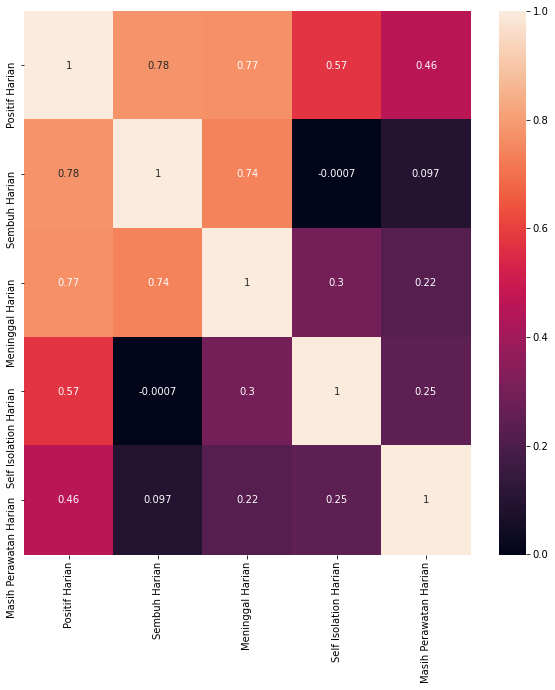

In [63]:
plt.figure(figsize=[10, 10])
sns.heatmap(data_harian[['Positif Harian', 'Sembuh Harian', 'Meninggal Harian', 'Self Isolation Harian', 'Masih Perawatan Harian']].corr(), annot=True)
plt.show()

In [64]:
data_harian[['Positif Harian', 'Sembuh Harian', 'Meninggal Harian', 'Self Isolation Harian', 'Masih Perawatan Harian']].describe()

,Positif Harian,Sembuh Harian,Meninggal Harian,Self Isolation Harian,Masih Perawatan Harian
count,487.000000,487.000000,487.000000,487.000000,487.000000
mean,1115.950719,954.708419,17.425051,98.211499,45.605749
std,1293.180643,963.252516,14.607133,655.783274,338.367602
min,0.000000,0.000000,0.000000,-3345.000000,-1271.000000
25%,197.500000,150.000000,6.000000,-83.500000,-66.500000
50%,845.000000,835.000000,15.000000,29.000000,20.000000
75%,1365.000000,1233.000000,22.000000,194.000000,121.000000
max,9394.000000,5757.000000,79.000000,4635.000000,1999.000000
